In [5]:
# Data Wrangling
import pandas as pd
import numpy as np

#Statistics / Logistic Regression 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from scipy import stats

#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Model turning
from sklearn.model_selection import GridSearchCV

RANDOM_STATE=42
%matplotlib inline

In [4]:
pip install statsmodels

  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Note: you may need to restart the kernel to use updated packages.


### Load Dataset & Get Overview of the Data

In [7]:
credit_original_data = pd.read_csv("D:/archive/fraudTest.csv")
credit_original_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
cc_data = credit_original_data.copy()
cc_data.info()
cc_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the formula for logistic regression
logit_equation = 'is_fraud ~ cc_num + amt + zip + lat + long + city_pop + unix_time + merch_lat + merch_long'

# Fit the model using GLM (Generalized Linear Model) with Binomial family (logistic regression)
fit1 = smf.glm(formula=logit_equation, data=cc_data, family=sm.families.Binomial()).fit()

# Print the summary
print(fit1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_fraud   No. Observations:               555719
Model:                            GLM   Df Residuals:                   555717
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14053.
Date:                Sun, 20 Apr 2025   Deviance:                       28106.
Time:                        23:54:46   Pearson chi2:                 5.02e+05
No. Iterations:                    12   Pseudo R-squ. (CS):          2.787e-05
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.543e-16   2.44e-16     -1.450      0.1

In [11]:
# Columns to keep
target_columns = ['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
                  'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

# Create a new DataFrame with the selected columns
cc_data = cc_data[target_columns]

# Preview the updated DataFrame
cc_data.head()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


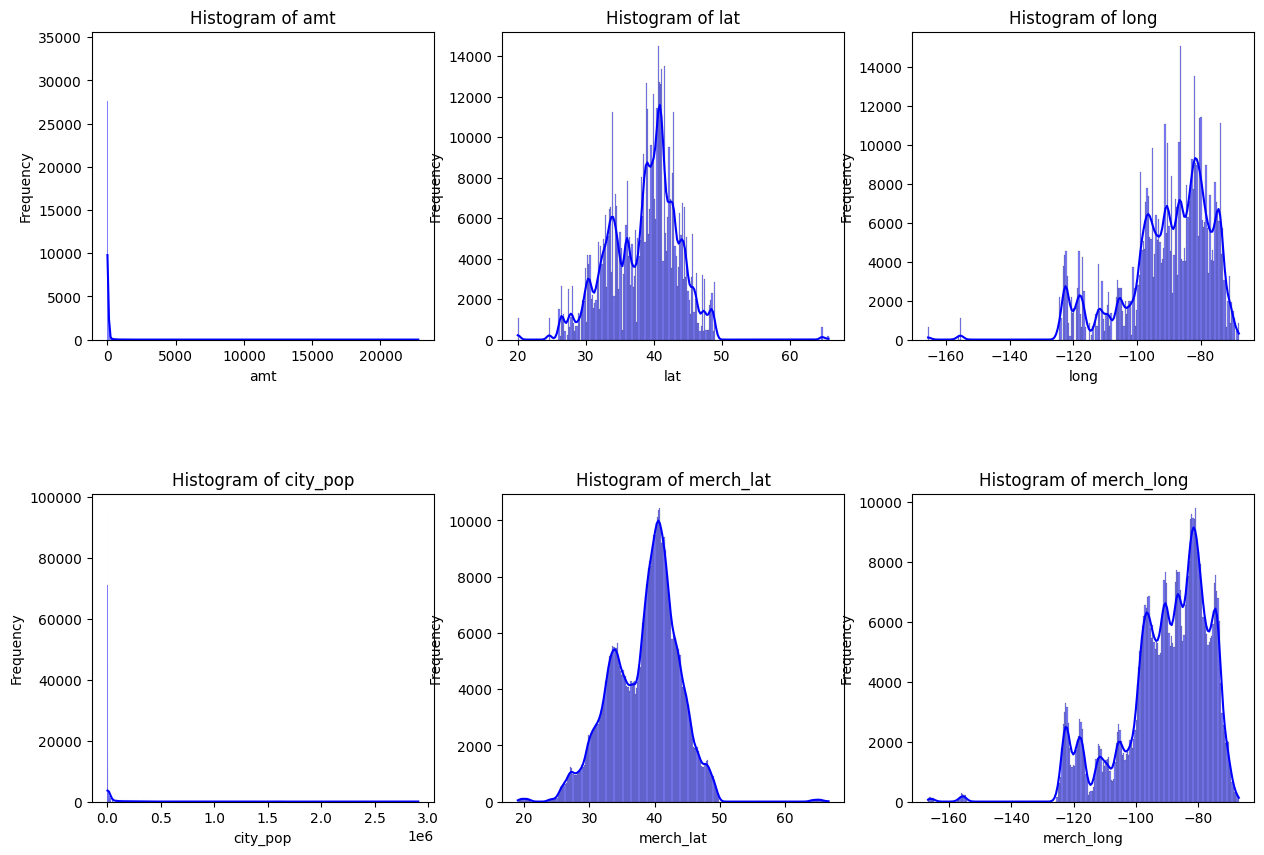

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns you want to plot (adjusted to your dataset)
columns_to_plot = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# Create subplots for the histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_to_plot):
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(data=cc_data, x=col, kde=True, color='blue', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Histogram of {col}')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Frequency')

# Remove empty subplots, if any
for i in range(len(columns_to_plot), 2 * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()


## Distribution of Fraudulent Transactions in Dataset

C:\Users\HP 430 G6\AppData\Local\Temp\ipykernel_7200\1715726633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=cc_data, palette='Set1')


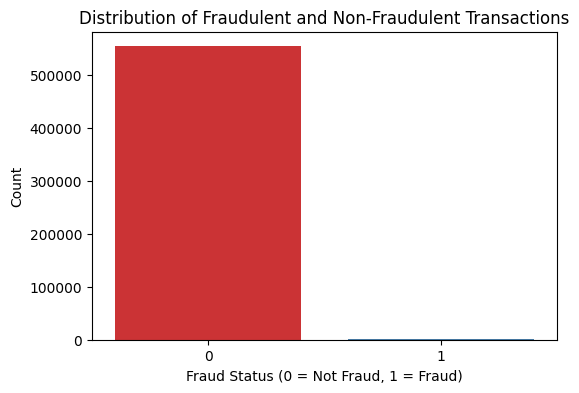

Count of Fraudulent Transactions: 2145
Count of Non-Fraudulent Transactions: 553574


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of fraud vs. non-fraud
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=cc_data, palette='Set1')
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Fraud Status (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# Count fraudulent and non-fraudulent transactions
fraud_count = (cc_data['is_fraud'] == 1).sum()
nonfraud_count = (cc_data['is_fraud'] == 0).sum()
print("Count of Fraudulent Transactions:", fraud_count)
print("Count of Non-Fraudulent Transactions:", nonfraud_count)


In [15]:
#perform logistic regression using glm (generalized linear model) method.
#Note, we leave out Amount as it isn't statistically significant
import statsmodels.api as sm
import statsmodels.formula.api as smf

logit_eq = 'is_fraud ~ lat + long + amt + merch_lat + merch_long'
fit1 = smf.glm(logit_eq, data=cc_data, family=sm.families.Binomial()).fit()
print(fit1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_fraud   No. Observations:               555719
Model:                            GLM   Df Residuals:                   555713
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13094.
Date:                Mon, 21 Apr 2025   Deviance:                       26187.
Time:                        00:03:32   Pearson chi2:                 4.76e+15
No. Iterations:                    10   Pseudo R-squ. (CS):           0.003475
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6314      0.218    -30.365      0.0

## Cross Validation of our Model
Using the validation set approach, we estimate the test error of this model.
- Split the sample set into a random training set and a random validation set. Use a test size of 20%
- Store the training set in <b>train</b>, testing set in <b>test</b>


In [16]:
#split data into training and validation/test set
train, test = train_test_split(cc_data, test_size=0.2, random_state = 42)

#Fit logistic regression model with training set
fit2 = smf.glm(logit_eq, data=train, family=sm.families.Binomial()).fit()

In [18]:
#Make predictions on the validation set with the new model
predictions = fit2.predict(test)

#Convert predicted probabilities to binary predictions: 1 if prob>0.5
encode = lambda x: 1 if x>=0.5 else 0
predicted = predictions.map(encode)

# compare the predicted values with the actual values in the test set
misclassified = (predicted != test['is_fraud']).sum()

mis_rate = misclassified/len(test)
print("Our model has a misclassifcation rate of:", mis_rate*100, "%")

Our model has a misclassifcation rate of: 0.4165766932987836 %


## Confusion Matrix

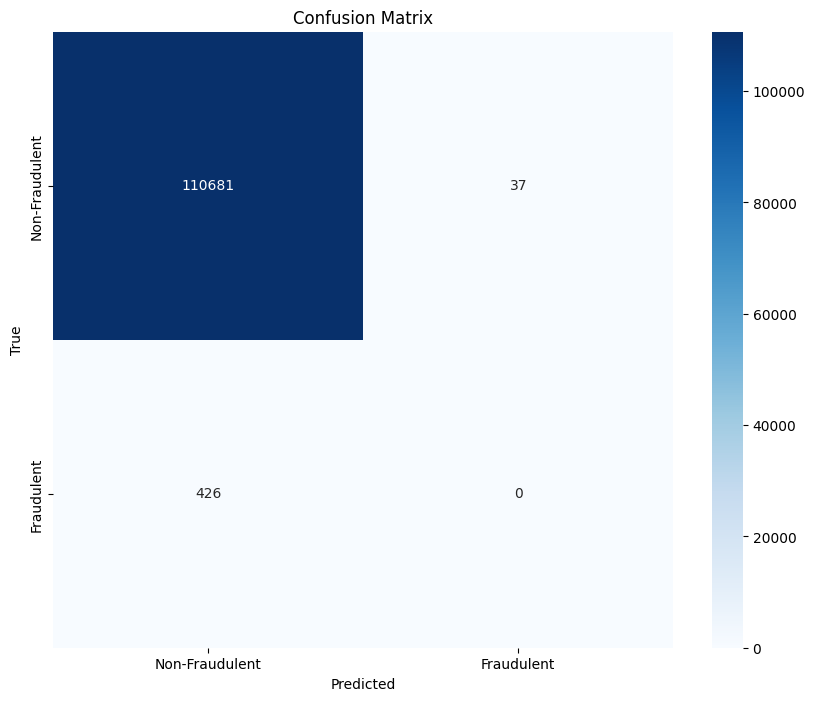

In [19]:
true_labels = test['is_fraud']
cm = confusion_matrix(true_labels, predicted)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
test_sizes = [0.1, 0.3, 0.5]
#to store the misclassification accuracy score for each model
model_rates = []
#to store the model parameters
model_params = []

#iterate through each test size
for test_size in test_sizes:
    
    #split data into training and validation sets
    train, test = train_test_split(cc_data, test_size=test_size, random_state = 42)
    
    #fit the logistic regression model on training set
    model = smf.glm(logit_eq, data=train, family=sm.families.Binomial()).fit()
    
    #Store model parameters
    model_params.append(model.params)
    
    #Get predictions on test/validation test
    predicted_probs = model.predict(test)
    
    #Classifdy predictions on 0.5 threshold
    predicted = predicted_probs.map(encode)
    
    #Calculate misclassification rate & store rates
    misclassified = (predicted != test['is_fraud']).sum()
    mis_rate = misclassified / len(test)
    model_rates.append(mis_rate)

#Store misclassification rates in designated variables
mis_rate_10, mis_rate_30, mis_rate_50 = model_rates

In [23]:
print(f"Misclassification Rate for 10% Test Size:", mis_rate_10*100, "%")
print(f"Misclassification Rate for 30% Test Size:", mis_rate_30*100, "%")
print(f"Misclassification Rate for 50% Test Size:", mis_rate_50*100, "%")

Misclassification Rate for 10% Test Size: 0.41387749226229037 %
Misclassification Rate for 30% Test Size: 0.4156769596199525 %
Misclassification Rate for 50% Test Size: 0.42539408335132806 %


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Store all misclassification rates
misclass_rates = []

# Define the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Perform cross-validation for 10 trials
for trial in range(10):
    # Define cross-validation method with 10 splits, shuffling, and random state
    cv_method = KFold(n_splits=10, shuffle=True, random_state=trial)
    
    # Perform cross-validation and get accuracy scores for each fold
    scores = cross_val_score(model, cc_data[['amt', 'lat', 'long', 'city_pop', 'unix_time']], cc_data['is_fraud'], cv=cv_method, scoring='accuracy')
    
    # Calculate misclassification rate for each fold (1 - accuracy)
    misclass_rate = 1 - scores
    misclass_rates.extend(misclass_rate)
    
# Calculate the average misclassification rate over all folds
mis_rate_kfold = np.mean(misclass_rates)
print(f'Misclassification Rate (KFold): {mis_rate_kfold}')


Misclassification Rate (KFold): 0.0038834375928613863


In [27]:
# Assuming 'credit_original_data' is your original dataset (already loaded)

# Create a copy of the original dataset
cc_data = credit_original_data.copy()

# Drop the 'Unnamed: 0' and 'amt' columns as they are not needed
cc_data = cc_data.drop(columns=['Unnamed: 0', 'amt'])

# Display the first few rows of the dataset
cc_data.head()



,trans_date_trans_time,cc_num,merchant,category,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [36]:
import pandas as pd

# Assuming 'cc_data' is your dataframe
# Convert 'unix_time' to datetime first, then convert it to Unix timestamp (int64)
cc_data['unix_time'] = pd.to_datetime(cc_data['unix_time'], errors='coerce')

# Check for any rows with invalid date conversion (i.e., NaT values)
cc_data = cc_data.dropna(subset=['unix_time'])

# Convert 'unix_time' to Unix timestamp in seconds (as int64)
cc_data['unix_time'] = cc_data['unix_time'].astype('int64') / 10**9  # Convert to Unix timestamp in seconds

# Drop non-numeric and irrelevant columns for correlation analysis
cc_data = cc_data.drop(columns=['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 
                                 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], errors='ignore')

# Ensure that all remaining columns are numeric for correlation
cc_data = cc_data.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values that might have been introduced during the conversion to numeric
cc_data = cc_data.dropna()

# Now calculate correlations on the numeric columns
corr_matrix = cc_data.corr()

# Find the correlation of 'is_fraud' with all predictor variables
corr_is_fraud = corr_matrix['is_fraud']

# Find the predictor with the highest positive correlation
highest_corr = corr_is_fraud.drop('is_fraud').idxmax()

# Print the feature that has the highest correlation with fraud detection
print(f"The feature that has the highest correlation with Credit Card Fraud is: {highest_corr}")


The feature that has the highest correlation with Credit Card Fraud is: lat


In [38]:
X = cc_data.drop('is_fraud', axis=1) # All predictor variables
y = cc_data['is_fraud'] # Target Output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Create Bagging Classifier
bag = BaggingClassifier(random_state=42)

# Train Bagging Classifier
bag.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [40]:
# Make Predictions using BagClassifier on test data
y_pred = bag.predict(X_test)

# Calculate Precision, Recall, and Accuracy Scores
bag_precision = precision_score(y_test, y_pred)
bag_recall = recall_score(y_test, y_pred)
bag_accuracy = accuracy_score(y_test, y_pred)

print(f"Bagging Classifier - Precision: {bag_precision}")
print(f"Bagging Classifier - Recall: {bag_recall}")
print(f"Bagging Classifier - Accuracy: {bag_accuracy}")

Bagging Classifier - Precision: 0.38823529411764707
Bagging Classifier - Recall: 0.07746478873239436
Bagging Classifier - Accuracy: 0.9959961851292017


In [41]:
bag_misclass_rate = (1 - bag_accuracy)*100
print(f"Bagging misclassification rate: {bag_misclass_rate:.2f}%")

Bagging misclassification rate: 0.40%


In [42]:
# Create Random Forest Classifier
rf = RandomForestClassifier()

#Train rf classifier
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
# Predict test outcomes using random forest classifier
y_pred_rf = rf.predict(X_test)

rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"RandomForest Classifier - Precision: {rf_precision}")
print(f"RandomForest Classifier - Recall: {rf_recall}")
print(f"RandomForest Classifier - Accuracy: {rf_accuracy}")

RandomForest Classifier - Precision: 0.8378378378378378
RandomForest Classifier - Recall: 0.07276995305164319
RandomForest Classifier - Accuracy: 0.9963920679478874


In [44]:
rf_misclass_rate = (1 - rf_accuracy)*100
print(f"Random Forest misclassification rate: {rf_misclass_rate:.2f}%")

Random Forest misclassification rate: 0.36%


In [45]:
# Access the feature importances
feature_importances = rf.feature_importances_

# Get the feature names from your dataset
feature_names = X_train.columns

# Print all features and their importances
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"Feature {feature_name}: Importance = {importance:.4f}")

Feature lat: Importance = 0.0293
Feature long: Importance = 0.0293
Feature city_pop: Importance = 0.0286
Feature unix_time: Importance = 0.0000
Feature merch_lat: Importance = 0.4529
Feature merch_long: Importance = 0.4599
